In [1]:
print("hello world! ")

hello world! 


In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
# sns.set_context('paper', font_scale=0.73)
sns.set_context('paper', font_scale=1.3)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

In [ ]:
#paths
root_dir = "/home/ryan/haveibeentrainedon/models/unstealthy_scaling"
dataset_name = "wikitext"
model_size = "70M"
scored_file = "scored.csv"

base_model_dir = f"{root_dir}/{dataset_name}"

In [10]:
models = list(filter(lambda x: x[-5:] == "model", os.listdir(os.path.join(base_model_dir, model_size))))
models = sorted(models, key = lambda x: eval(x[:-6]))
models

['1_model',
 '2_model',
 '4_model',
 '8_model',
 '16_model',
 '32_model',
 '64_model']

In [11]:
total_dfs = []
for model_type in models:
    total_dfs += [pd.read_csv(os.path.join(base_model_dir, model_size, model_type, scored_file), header=None)]
total_dfs

FileNotFoundError: [Errno 2] No such file or directory: '/home/ryan/haveibeentrainedon/models/unstealthy_repetition/wikitext/70M/1_model/scored.csv'

In [7]:
#We first extract our watermark from the null hypothesis

watermark_df = pd.DataFrame(columns=total_dfs[0].columns)

for df in total_dfs:
    curr_watermark = df.iloc[0]
    watermark_df.loc[len(watermark_df)] = curr_watermark
    df.drop(0, inplace=True)

watermark_df.reset_index(drop=True, inplace=True)
watermark_df

,0,type
0,52116.035156,1.0
1,47063.433594,1.0
2,55053.484375,1.0
3,39024.957031,1.0
4,42498.523438,1.0
5,34784.238281,1.0
6,30985.783203,1.0
7,35201.312500,1.0
8,63922.875000,1.0
9,37493.085938,1.0


In [8]:
combined_df = pd.concat(total_dfs, keys=[str(i) for i in range(15, 301, 15)], names=["rep_num"])
combined_df.reset_index(inplace=True)
combined_df

,rep_num,level_1,0,type
0,15,1,27222.902344,0
1,15,2,27548.630859,0
2,15,3,274700.187500,0
3,15,4,737923.000000,0
4,15,5,200510.703125,0
...,...,...,...,...
19995,300,996,20169.431641,0
19996,300,997,5289.316895,0
19997,300,998,158717.046875,0
19998,300,999,57932.585938,0


In [8]:
x = [i for i in range(15, 301, 15)]
y = [df[0][0] for df in total_dfs]
print(x)
print(y)

[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300]
[8594.0341796875, 6322.13330078125, 3481.694580078125, 1228.23828125, 789.4550170898438, 511.34759521484375, 262.03500366210943, 209.35198974609372, 135.70408630371094, 233.17247009277344, 85.6819839477539, 91.61839294433594, 49.15475082397461, 70.9472885131836, 46.12140274047852, 67.17471313476561, 47.75984191894531, 52.6491813659668, 47.33916473388672, 29.310949325561523]


array([9.05882354, 8.75181198, 8.1552744 , 7.11333613, 6.67134286,
       6.23704958, 5.5684781 , 5.344017  , 4.91047668, 5.45177839,
       4.45064258, 4.51763205, 3.8949735 , 4.26193719, 3.83127711,
       4.20729688, 3.86618516, 3.96365069, 3.85733796, 3.37796114])

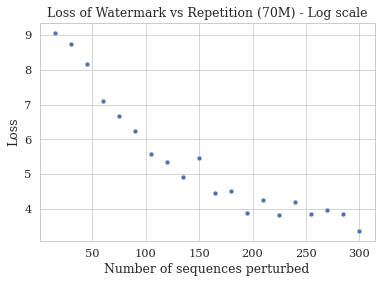

In [49]:
sns.scatterplot(x = x, y = np.log(y))
plt.xlabel("Number of sequences perturbed")
plt.ylabel("Loss")
plt.title("Loss of Watermark vs Repetition (70M) - Log scale")
plt.show()

In [55]:

z_scores = []
null_mean = []
null_stdev = []

for df in total_dfs:
    null = df[0][:]
    mean = np.log(null).mean()
    stdev = np.log(null).std()
    # rank = null.rank(method="min")
    # print(rank[null == df[0][0]].values[0])

    statistic = np.log(df[0][0])

    z_scores += [(statistic - mean) / stdev]
    null_mean += [mean]
    null_stdev += [stdev]


In [56]:
z_scores


[-1.3226349387855603,
 -1.6367864445417806,
 -2.0179834445092713,
 -2.815434301452483,
 -3.2017292772408665,
 -3.3162405813595517,
 -3.8264966224465367,
 -4.302650727204003,
 -4.40298303946391,
 -4.23868323305957,
 -4.769260289478527,
 -4.728870772372989,
 -5.343393389238759,
 -4.94582227010396,
 -5.378422848135805,
 -4.884393638804676,
 -5.309817119922825,
 -5.026831957775047,
 -5.233458442321415,
 -5.336633685434252]

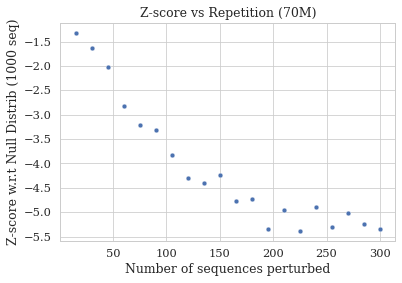

In [57]:
sns.scatterplot(x = x, y = z_scores)
plt.xlabel("Number of sequences perturbed")
plt.ylabel("Z-score w.r.t Null Distrib (1000 seq)")
plt.title("Z-score vs Repetition (70M)")
plt.show()

In [37]:
#if we want to plot a null distribution
null_distr = total_dfs[0].iloc[1:]
null_distr

,0
1,97254.398438
2,293074.031250
3,324114.250000
4,944158.187500
5,5874.359863
...,...
996,52849.781250
997,118041.445312
998,73896.773438
999,105096.320312


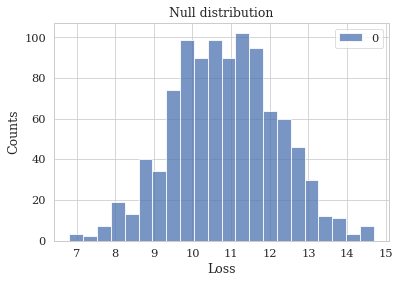

In [51]:
sns.histplot(np.log(null_distr))
plt.xlabel("Loss")
plt.ylabel("Counts")
plt.title("Null distribution")
plt.show()

In [53]:
null_mean = []
for df in total_dfs:
    null = df[0][:]
    mean = null.mean()

    null_mean += [mean]
null_mean

[126264.17058344488,
 138651.58636078276,
 123865.60827844031,
 127574.69320535421,
 134799.0914504807,
 115000.23094215355,
 125850.61565299325,
 118807.57851761275,
 116325.49972011326,
 128928.54015502015,
 123831.36155760895,
 116298.63317570796,
 108088.25237954414,
 116706.14512229561,
 118243.17316655893,
 117872.51823905464,
 132680.13142077954,
 117980.84018009502,
 121906.909727289,
 128155.66776421783]

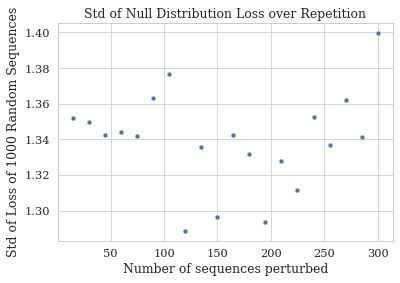

In [61]:
sns.scatterplot(x = x, y = null_stdev)
plt.xlabel("Number of sequences perturbed")
plt.ylabel("Std of Loss of 1000 Random Sequences")
plt.title("Std of Null Distribution Loss over Repetition")
plt.show()